In [207]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
try:
    import json
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

In [15]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/anthony/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthony/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/anthony/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anthony/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
df = pd.read_csv("ner_data.csv")


<AxesSubplot: >

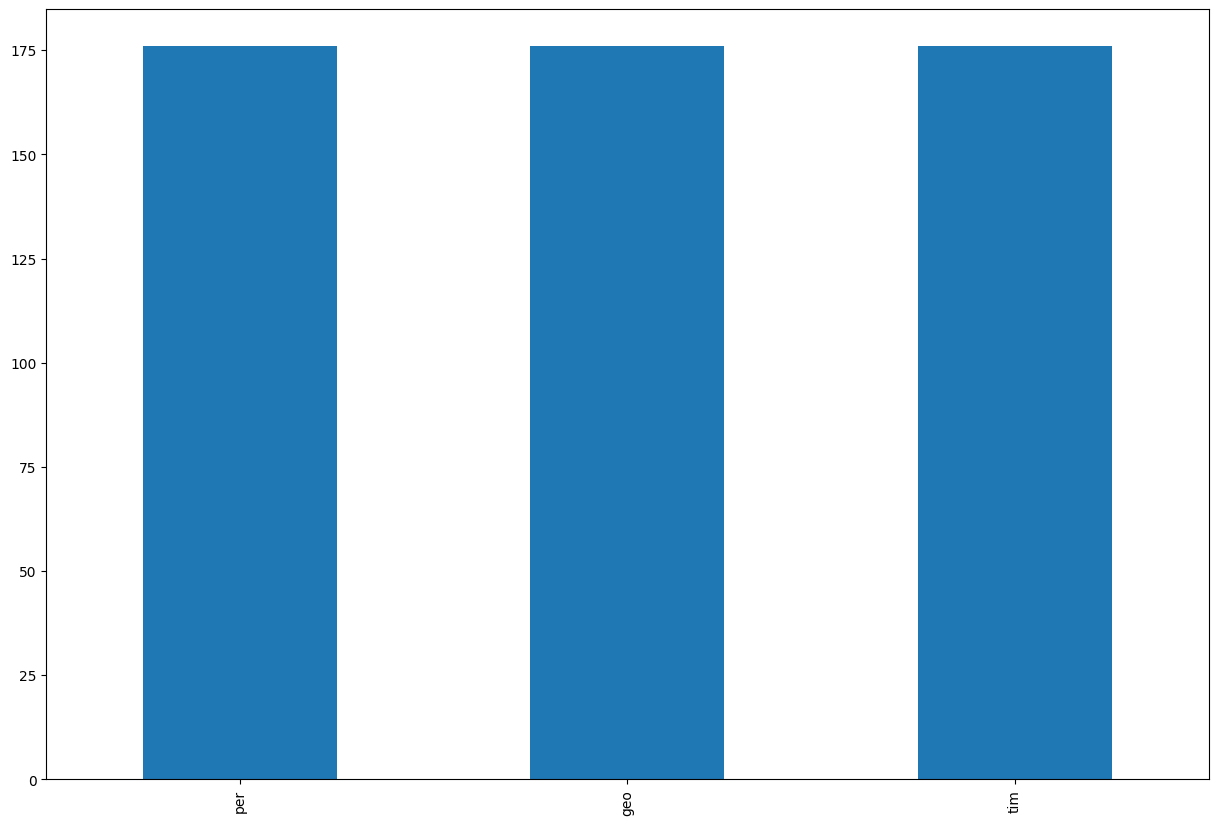

In [17]:
df['Tag'].value_counts().plot( kind='bar', figsize=(15,10))

In [18]:
df.describe()


,Sentence #,Word,POS,Tag
count,3,528,353,528
unique,3,31,3,3
top,Sentence: 1,vendortest1,NN,per
freq,1,32,176,176


In [19]:
df.head(2)

,Sentence #,Word,POS,Tag
0,Sentence: 1,kdlasjkaksd,NN,per
1,NaN,vendor1234,NN,per


In [20]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['<p>','</P>']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
def clean_txt(text):
    return text

In [21]:
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0

In [22]:
nltk.download('omw-1.4')
df['text'] = df['Word'] 
df['text'] = df['text'].swifter.apply(clean_txt)
df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subj_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))

[nltk_data] Downloading package omw-1.4 to /Users/anthony/nltk_data...


Pandas Apply:   0%|          | 0/528 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/528 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/528 [00:00<?, ?it/s]

In [23]:
X = df[['text', 'polarity', 'subjectivity','len']]
y =df['Tag']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
v = dict(zip(list(y), df['Tag'].to_list()))

In [24]:
X

,text,polarity,subjectivity,len
0,kdlasjkaksd,0.0,0.0,11
1,vendor1234,0.0,0.0,10
2,ServeIT,0.0,0.0,7
3,vendors123,0.0,0.0,10
4,vendor23das,0.0,0.0,11
...,...,...,...,...
523,2022-03-03 12:21:25.114+00,0.0,0.0,26
524,2020-08-29 16:55:51.96+05:30,0.0,0.0,28
525,2022-03-02 07:28:26.228+00,0.0,0.0,26
526,2022-02-28 09:42:42.832+00,0.0,0.0,26


In [25]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
text_clf = Pipeline([('vect', CountVectorizer(analyzer="word", stop_words="english")),
                    ('tfidf', TfidfTransformer(use_idf=True)),
                    ('clf', MultinomialNB(alpha=.01)),])

In [27]:
text_clf.fit(x_train['text'].to_list(), list(y_train))


Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [28]:
import numpy as np
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)

In [29]:
predicted = text_clf.predict(X_TEST)


In [30]:
c = 1

for doc, Tag in zip(X_TEST, predicted):
    
    if c == 2:break
    
    print("-"*55)
    print(doc)
    print(v[Tag])
    print(Tag)
    print("-"*30)

    c = c + 1 
   

-------------------------------------------------------
<p>1 State route 27 Taylor, Wayne</p>
geo
0
------------------------------


In [31]:
# accuracy
np.mean(predicted == Y_TEST)

0.9811320754716981

###labels:
1 - person
0 - geo
2 - date/time

In [32]:
docs_new = ['2002-22-21']

In [33]:
pred = text_clf.predict(docs_new)

In [34]:
v[pred[0]]

'tim'

In [35]:
pred[0]

2

In [36]:
#saving the model
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(text_clf,f)

In [52]:
text = '2022-10-12'

model = pickle.load(open('model.pkl','rb'))

res = model.predict([text])

print(res[0])



2


In [53]:
# 0 - location
# 1 - person
# 2 - date and time